In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set random seed for reproducibility
np.random.seed(42)

# Load the data from your specific location
data_path = r"C:\Users\DELL\Downloads\mitbih_train.csv"
df = pd.read_csv(data_path, header=None)

# Separate features and labels
X = df.iloc[:, :-1]  # All columns except last
y = df.iloc[:, -1]   # Last column is label

In [32]:
# 1. Data Overview
print("Dataset Structure:")
print("\nData shape:", X.shape)
print("\nClass distribution:")
class_counts = pd.Series(y).value_counts()
print(class_counts)

# Calculate anomaly rate
normal_count = (y == 0).sum()
total_count = len(y)
anomaly_rate = (total_count - normal_count) / total_count * 100
print(f"\nAnomaly rate: {anomaly_rate:.2f}%")

Dataset Structure:

Data shape: (87554, 187)

Class distribution:
187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

Anomaly rate: 17.23%


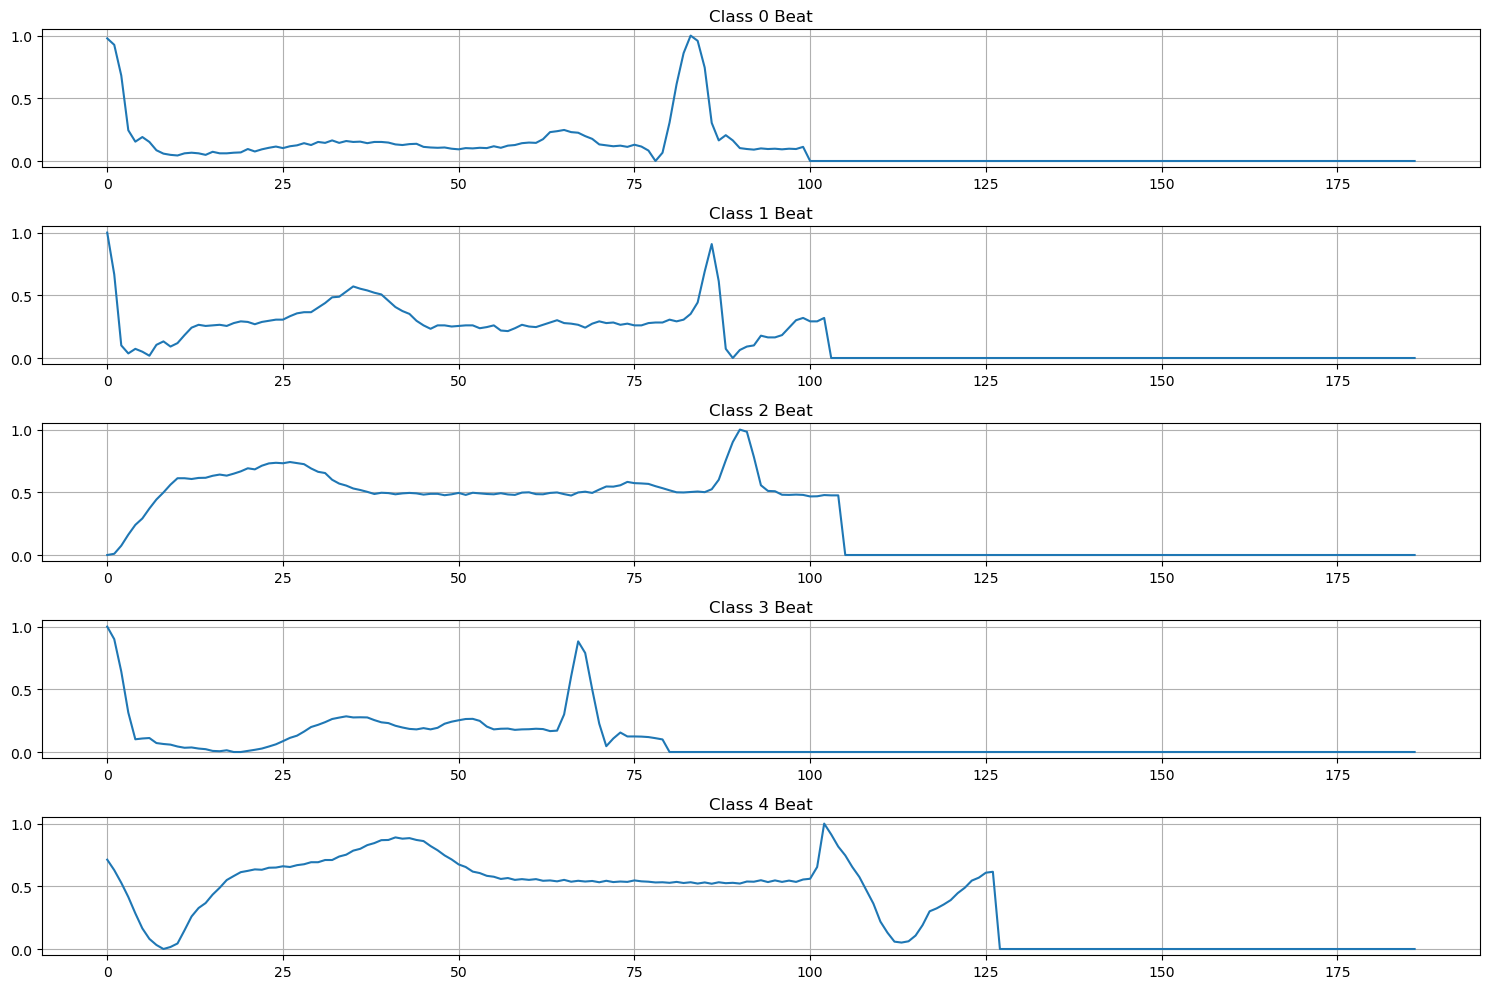

In [33]:
# 2. Visualize Sample Beats
plt.figure(figsize=(15, 10))
for i in range(5):  # Plot 5 different types of beats
    # Get a sample of each class
    sample_idx = y[y == i].index[0]
    plt.subplot(5, 1, i+1)
    plt.plot(X.iloc[sample_idx])
    plt.title(f'Class {i} Beat')
    plt.grid(True)
plt.tight_layout()
plt.show()

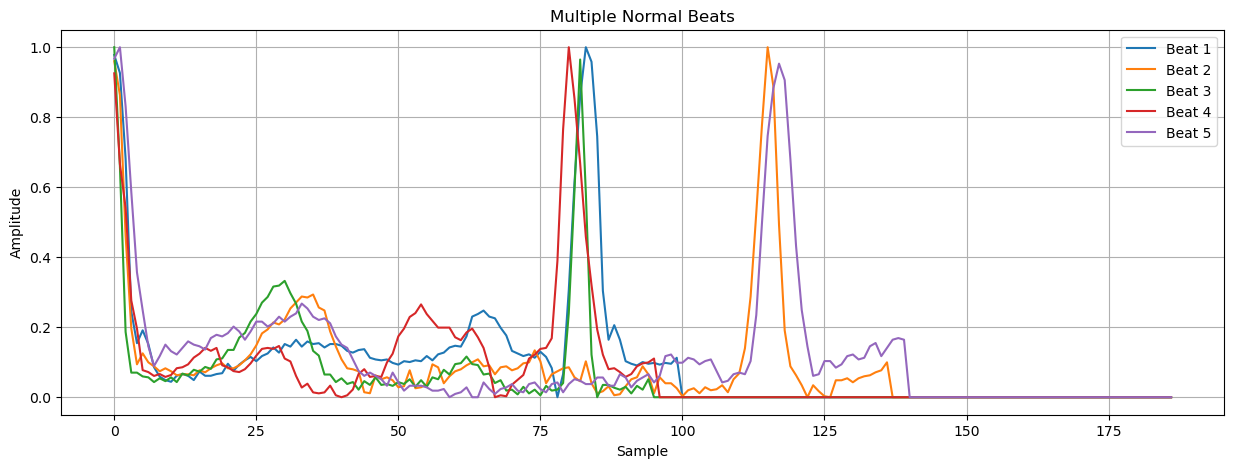

In [34]:
# 3. Time Series Analysis
# Plot multiple normal beats
plt.figure(figsize=(15, 5))
normal_beats = X[y == 0].iloc[:5]
for i in range(5):
    plt.plot(normal_beats.iloc[i], label=f'Beat {i+1}')
plt.title('Multiple Normal Beats')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# 4. Statistical Analysis
print("\nStatistical Analysis:")
print("\nNormal beats statistics:")
print(X[y == 0].describe())

print("\nAnomaly beats statistics:")
print(X[y != 0].describe())


Statistical Analysis:

Normal beats statistics:
                0             1             2             3             4    \
count  72471.000000  72471.000000  72471.000000  72471.000000  72471.000000   
mean       0.915356      0.778014      0.403563      0.177536      0.164311   
std        0.211878      0.196904      0.214232      0.165603      0.131844   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.943983      0.716837      0.240857      0.038462      0.075075   
50%        0.997368      0.832370      0.409226      0.131818      0.132964   
75%        1.000000      0.910388      0.556351      0.281046      0.219796   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  72471.000000  72471.000000  72471.000000  72471.000000  72471.000000   
mean       0.180612      0.180137      0.180581      0.183188      0.188259   
st

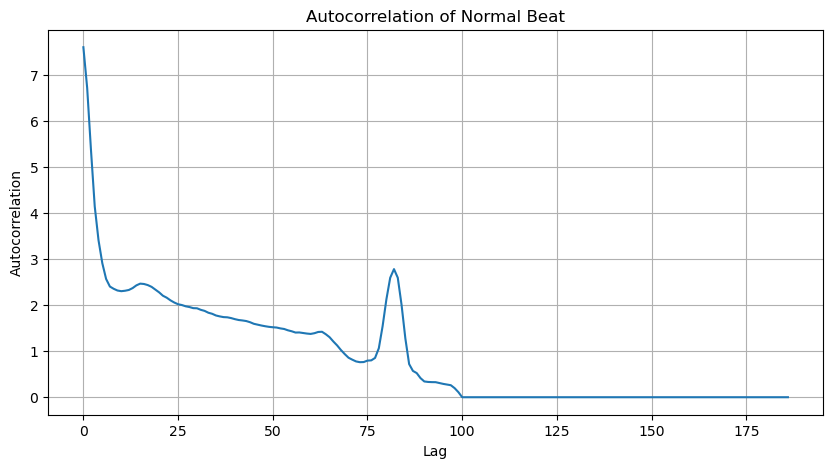

In [36]:
# 5. Pattern Analysis
# Calculate autocorrelation for a normal beat
normal_beat = X[y == 0].iloc[0]
autocorr = np.correlate(normal_beat, normal_beat, mode='full')
autocorr = autocorr[len(autocorr)//2:]

plt.figure(figsize=(10, 5))
plt.plot(autocorr)
plt.title('Autocorrelation of Normal Beat')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [37]:
# 6. Key Findings
print("\nKey Findings:")
print("1. Data Characteristics:")
print(f"   - Total beats: {len(y)}")
print(f"   - Number of features: {X.shape[1]}")
print(f"   - Number of classes: {len(np.unique(y))}")

print("\n2. Time Patterns:")
print("   - Each beat is 187 samples long")
print("   - Clear periodic patterns")
print("   - Different morphologies for different classes")

print("\n3. Anomaly Characteristics:")
print(f"   - Anomaly rate: {anomaly_rate:.2f}%")
print("   - Multiple types of anomalies")
print("   - Distinct patterns for each anomaly type")

print("\n4. Anomaly Detection Considerations:")
print("   - Need to account for beat morphology")
print("   - Consider temporal patterns")
print("   - Look for specific waveform characteristics")


Key Findings:
1. Data Characteristics:
   - Total beats: 87554
   - Number of features: 187
   - Number of classes: 5

2. Time Patterns:
   - Each beat is 187 samples long
   - Clear periodic patterns
   - Different morphologies for different classes

3. Anomaly Characteristics:
   - Anomaly rate: 17.23%
   - Multiple types of anomalies
   - Distinct patterns for each anomaly type

4. Anomaly Detection Considerations:
   - Need to account for beat morphology
   - Consider temporal patterns
   - Look for specific waveform characteristics
